# 3D Model Generator

This notebook provides an interactive interface for generating 3D models from photos or text prompts.

## Setup

First, let's import the necessary modules and set up logging.

In [4]:
import os
import sys
from pathlib import Path
import logging
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import trimesh

# Add the current directory to the path so we can import our modules
sys.path.append(os.getcwd())

# Import our modules
from src.photo_to_3d import photo_to_model as photo_to_3d
from src.text_to_3d import text_to_model as text_to_3d
from utils.file_utils import validate_file, ensure_dir, list_files_by_extension
from config.settings import load_config, setup_logging

# Set up logging
setup_logging()
logger = logging.getLogger(__name__)

## Configuration

Load the configuration settings.

In [5]:
# Load configuration
config = load_config()
print("Configuration loaded:")
print(f"- Photo to 3D method: {config['photo_to_3d']['depth_estimation_method']}")
print(f"- Text to 3D model type: {config['text_to_3d']['model_type']}")
print(f"- Default output format: {config['output']['default_format']}")

2025-04-29 08:47:44,113 - config.settings - INFO - Loaded configuration from config\config.json


Configuration loaded:
- Photo to 3D method: simple
- Text to 3D model type: procedural
- Default output format: obj


## Helper Functions

Define some helper functions for visualization.

In [6]:
def display_image(image_path):
    """Display an image."""
    img = Image.open(image_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Image: {os.path.basename(image_path)}")
    plt.show()

def visualize_mesh(mesh_path):
    """Visualize a 3D mesh."""
    # Load the mesh
    mesh = trimesh.load(mesh_path)
    
    # Create a scene with the mesh
    scene = trimesh.Scene(mesh)
    
    # Show the mesh
    scene.show()

## Generate 3D Model from Photo

Upload a photo and generate a 3D model from it.

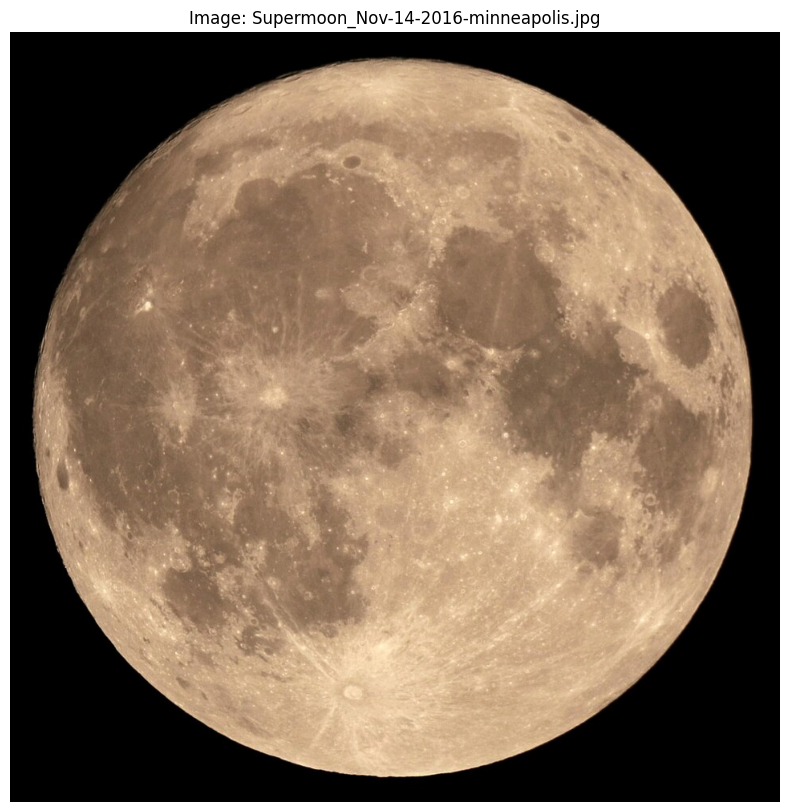

2025-04-29 08:49:07,670 - src.photo_to_3d - INFO - Processing image: data\Supermoon_Nov-14-2016-minneapolis.jpg


Generating 3D model from photo: data\Supermoon_Nov-14-2016-minneapolis.jpg


2025-04-29 08:49:07,914 - src.photo_to_3d - INFO - 3D model saved to: models/output.obj


3D model generated successfully: models/output.obj


In [9]:
# Set the input and output paths
input_image_path = "data\Supermoon_Nov-14-2016-minneapolis.jpg"  # Replace with your image path
output_model_path = "models/output.obj"

# Ensure the output directory exists
ensure_dir(Path(output_model_path).parent)

# Check if the input file exists
if not os.path.exists(input_image_path):
    print(f"Input image not found: {input_image_path}")
    print("Please upload an image to the 'data' directory and update the path.")
else:
    # Display the input image
    display_image(input_image_path)
    
    # Generate the 3D model
    print(f"Generating 3D model from photo: {input_image_path}")
    result = photo_to_3d(
        input_path=input_image_path,
        output_path=output_model_path,
        resolution=128,
        config=config
    )
    
    if result:
        print(f"3D model generated successfully: {output_model_path}")
        # Visualize the mesh
        visualize_mesh(output_model_path)
    else:
        print("Failed to generate 3D model.")

## Generate 3D Model from Text Prompt

Enter a text prompt and generate a 3D model from it.

In [10]:
# Set the text prompt and output path
text_prompt = "A mountain landscape"  # Replace with your text prompt
output_model_path = "models/text_output.obj"

# Ensure the output directory exists
ensure_dir(Path(output_model_path).parent)

# Generate the 3D model
print(f"Generating 3D model from text prompt: {text_prompt}")
result = text_to_3d(
    prompt=text_prompt,
    output_path=output_model_path,
    resolution=128,
    config=config
)

if result:
    print(f"3D model generated successfully: {output_model_path}")
    # Visualize the mesh
    visualize_mesh(output_model_path)
else:
    print("Failed to generate 3D model.")

2025-04-29 08:49:10,827 - src.text_to_3d - INFO - Processing text prompt: A mountain landscape


Generating 3D model from text prompt: A mountain landscape


2025-04-29 08:49:11,360 - src.text_to_3d - INFO - 3D model saved to: models/text_output.obj


3D model generated successfully: models/text_output.obj


## List Generated Models

List all the 3D models that have been generated.

In [11]:
# List all .obj files in the models directory
obj_files = list_files_by_extension("models", ".obj")
print(f"Found {len(obj_files)} .obj files:")
for file in obj_files:
    print(f"- {file}")

# List all .stl files in the models directory
stl_files = list_files_by_extension("models", ".stl")
print(f"\nFound {len(stl_files)} .stl files:")
for file in stl_files:
    print(f"- {file}")

Found 2 .obj files:
- models\output.obj
- models\text_output.obj

Found 0 .stl files:
